In [1]:
import cv2
import pytesseract
import logging
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(img, title):
    plt.title(title)
    plt.imshow(img)
    plt.show()

In [3]:
kazakh_alphabet = 'аәбвгғдеёжзийкқлмнңоөпрстуұүфхһцчшщъыіьэюя'

In [4]:
def resize_img(img, basewidth):
    print(img)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    return img

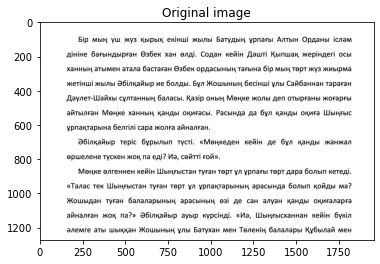

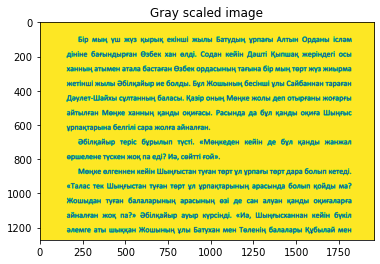

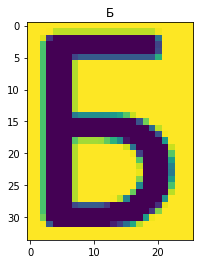

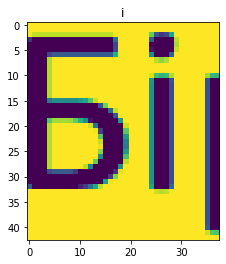

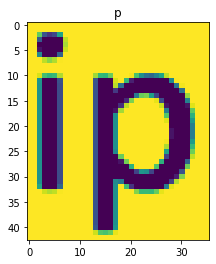

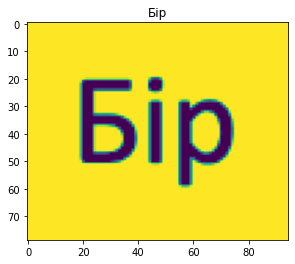

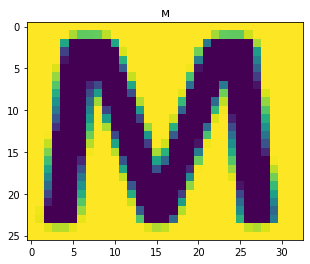

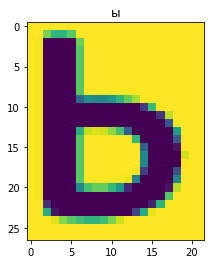

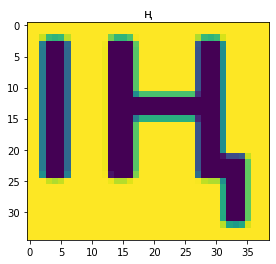

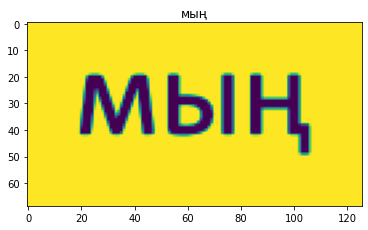

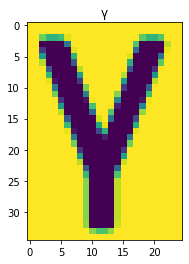

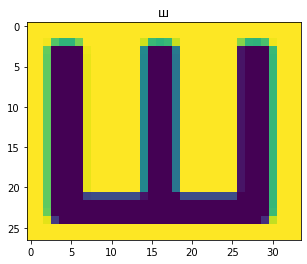

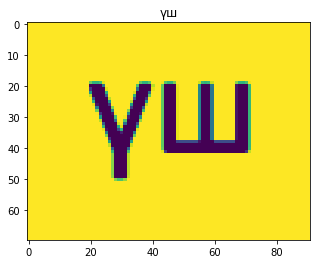

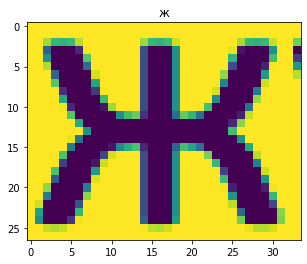

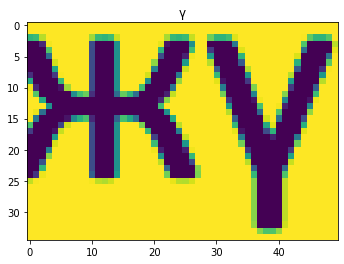

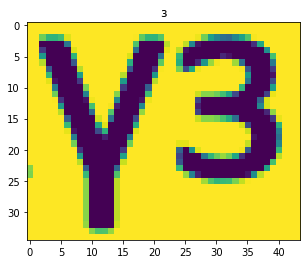

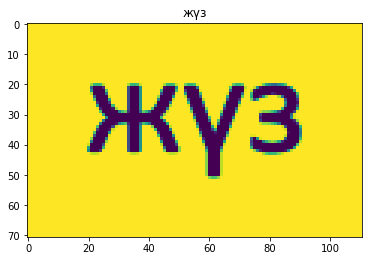

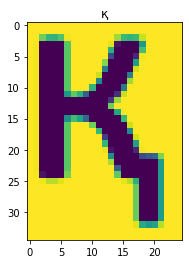

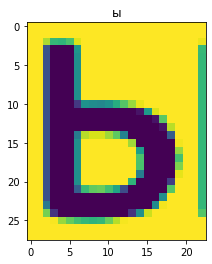

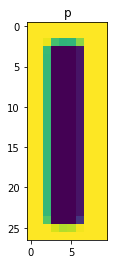

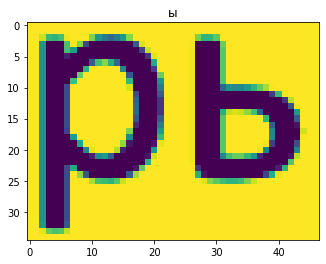

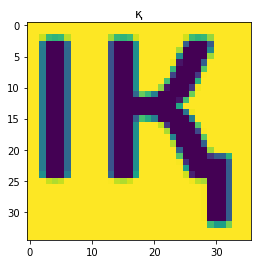

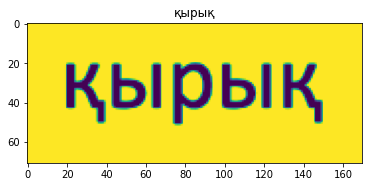

In [5]:
path_image = "img1.png" # IMG PATH

word_padding = 20 # WORD PADDING IN PIXELS
letter_padding = 2 # LETTER PADDING IN PIXELS

# OPEN IMAGE 
img = Image.open(path_image)
show_image(img, "Original image")

# GRAYSCALE
img = img.convert('L')
show_image(img, "Gray scaled image")

# GET IMAGE DATA
image_data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT, lang="kaz")

# WORD BOXES
k = 0
for i, word in enumerate(image_data['text']):
    if word != "":
        
        k = k + 1
        
        # GET WORD BORDERS
        (left, top, right, bottom) = image_data['left'][i], image_data['top'][i], image_data['left'][i] + image_data['width'][i], image_data['top'][i] + image_data['height'][i]
        # CROP WORDS
        img_croped_word = img.crop((left - word_padding, top - word_padding, right + word_padding, bottom + word_padding))
        
        # PIL IMAGE TO CV2
        opencv_image = cv2.cvtColor(np.array(img_croped_word), cv2.COLOR_RGB2BGR)
        
        # CV2 IMAGE PREPROCESSING
        opencv_image = cv2.resize(opencv_image, None, fx=1, fy=1, interpolation=cv2.INTER_AREA)
        opencv_image = cv2.GaussianBlur(opencv_image, (5, 5), 0)
        opencv_image = cv2.bilateralFilter(opencv_image, 9, 75, 75)
        
        # CV2 IMAGE HEIGHT AND WIDTH
        hlimg, wlimg = opencv_image.shape[0], opencv_image.shape[1]
        
        # GET LETTER BOXES
        data_letters_boxes = pytesseract.image_to_boxes(opencv_image, lang="kaz")
        
        for b in data_letters_boxes.splitlines():
            
            # GET LETTER BORDERS
            b = b.split(' ')
            x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
            # CROP LETTERS
            img_croped_letters = img_croped_word.crop((x-letter_padding, hlimg-h-letter_padding, w+3, hlimg-y+letter_padding))
            show_image(img_croped_letters, b[0])
        
        show_image(img_croped_word, image_data['text'][i])
        
        # WORD STOP
        if k == 5:
            break
        